Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

# Part 1 stations
df_bikes = pd.read_csv("vancouver_bike_stations.csv")
df_bikes = df_bikes.rename(columns={"name": "station_name"})

# Part 2 POIs
fsq_df  = pd.read_csv("foursquare_pois.csv")  
yelp_df = pd.read_csv("yelp_pois.csv")        

# Clean & align columns
fsq_clean = fsq_df.rename(columns={
    "place_name": "poi_name",
    "address":    "poi_address",
    "distance":   "poi_distance"
})[["station_name","poi_name","poi_address","poi_distance"]]

yelp_clean = yelp_df.rename(columns={
    "place_name":    "poi_name",
    "address":       "poi_address",
    "rating":        "poi_rating"
})[["station_name","poi_name","poi_address","poi_rating"]]

# Add source tags
fsq_clean["source"]  = "Foursquare"
yelp_clean["source"] = "Yelp"

# Concatenate into one combined POI table
combined = pd.concat([fsq_clean, yelp_clean], ignore_index=True)

# Join station info with POI counts
poi_counts = (
    combined
    .groupby("station_name")
    .size()
    .reset_index(name="poi_count")
)

df_joined = (
    df_bikes
    .merge(poi_counts, on="station_name", how="left")
    .fillna({"poi_count": 0})
)

df_joined.head()

,id,station_name,latitude,longitude,timestamp,free_bikes,empty_slots,extra,poi_count
0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,2025-05-15T22:10:18.971140+00:00Z,12,6,"{'uid': '0092', 'renting': True, 'returning': ...",10
1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,2025-05-15T22:10:19.278717+00:00Z,4,9,"{'uid': '0248', 'renting': True, 'returning': ...",10
2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,2025-05-15T22:10:19.223420+00:00Z,1,10,"{'uid': '0232', 'renting': True, 'returning': ...",10
3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,2025-05-15T22:10:18.888188+00:00Z,8,17,"{'uid': '0031', 'renting': True, 'returning': ...",10
4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,2025-05-15T22:10:19.277211+00:00Z,11,3,"{'uid': '0233', 'renting': True, 'returning': ...",10


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

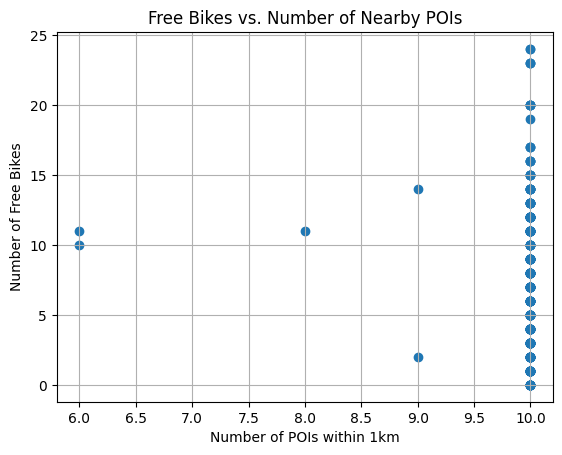

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df_joined["poi_count"], df_joined["free_bikes"])
plt.title("Free Bikes vs. Number of Nearby POIs")
plt.xlabel("Number of POIs within 1km")
plt.ylabel("Number of Free Bikes")
plt.grid(True)
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [3]:
# Make sure the directory exists
import os
os.makedirs("data", exist_ok=True)

# Connect to the same file
import sqlite3
conn = sqlite3.connect("data/bike_poi_data.db")
df_joined.to_sql("station_poi", conn, if_exists="replace", index=False)
conn.close()

Look at the data before and after the join to validate your data.

In [4]:
import sqlite3, pandas as pd

conn = sqlite3.connect("data/bike_poi_data.db")
print("Sample rows from station_poi:")
print(pd.read_sql_query("SELECT * FROM station_poi LIMIT 5;", conn))
conn.close()

Sample rows from station_poi:
                                 id           station_name   latitude  \
0  00fa94ad698dc4a9e4d708d6fd32f294       Chilco & Barclay  49.291909   
1  012d3e06901cc222b1c2cf0a2ace3a29   St George & Broadway  49.262321   
2  029a505bd4422a1afd127987757f71a6  Britannia Parking Lot  49.275882   
3  0438114d2e6b96118de69bc9775bb21e        Morton & Denman  49.288030   
4  0459b7e93703980b853cd65a9dc60596    Thornton & National  49.273777   

    longitude                          timestamp  free_bikes  empty_slots  \
0 -123.140713  2025-05-15T22:10:18.971140+00:00Z          12            6   
1 -123.093060  2025-05-15T22:10:19.278717+00:00Z           4            9   
2 -123.071865  2025-05-15T22:10:19.223420+00:00Z           1           10   
3 -123.142135  2025-05-15T22:10:18.888188+00:00Z           8           17   
4 -123.092723  2025-05-15T22:10:19.277211+00:00Z          11            3   

                                               extra  poi_count  
0 